# 時系列化してtimeがTに届いていないsampleを削除


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import datetime
from datetime import timedelta
import numpy as np

from tqdm import tqdm
import time

file_path="E:/Data/Private/MIMIC_III/mimic_csv/"
outfile_path="E:/Data/Private/MIMIC_III/mimic_csv/Clean_data/"

In [3]:
file_path="E:\\Data\\Private\\MIMIC_III\\mimic_csv\\Clean_data\\"
csv_file_path =file_path+"GRU_ODE_Dataset.csv"
covs_file_path=file_path+"GRU_ODE_covariates.csv"
tags_file_path=file_path+"GRU_ODE_death_tags.csv"

In [4]:
df=pd.read_csv(csv_file_path)
df.head()

,ID,Time,Value_0,Value_1,Value_2,Value_3,Value_4,Value_5,Value_6,Value_7,...,Mask_86,Mask_87,Mask_88,Mask_89,Mask_90,Mask_91,Mask_92,Mask_93,Mask_94,Mask_95
0,0.0,0.0,0.67391,-0.590107,0.859817,-1.231018,-0.450322,0.923803,-0.003803,-1.224005,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,9.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.817940,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,23.0,0.00000,0.000000,0.000000,0.000000,0.000000,1.209635,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,84.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,161.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
tags=pd.read_csv(tags_file_path)
tags

,ID,label
0,7513,0
1,10119,0
2,259,0
3,20877,0
4,3092,0
...,...,...
21252,2344,0
21253,4211,0
21254,20975,0
21255,21084,0


In [6]:
covs=pd.read_csv(covs_file_path)

In [19]:
np.array(list(df["ID"].value_counts()>100)

3471

(array([1.6122e+04, 2.5220e+03, 1.3290e+03, 6.9800e+02, 3.2000e+02,
        1.5300e+02, 6.6000e+01, 3.1000e+01, 1.2000e+01, 4.0000e+00]),
 array([  2. ,  63.6, 125.2, 186.8, 248.4, 310. , 371.6, 433.2, 494.8,
        556.4, 618. ]),
 <BarContainer object of 10 artists>)

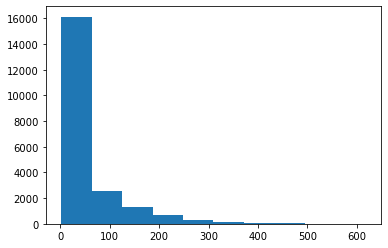

In [20]:
plt.hist(df["ID"].value_counts())

In [23]:
df.groupby("ID")["Time"].max()

ID
0.0        2874.0
1.0        1548.0
2.0        2876.0
3.0        2862.0
4.0        2297.0
            ...  
21252.0    2172.0
21253.0    2791.0
21254.0    1534.0
21255.0    2875.0
21256.0    2599.0
Name: Time, Length: 21257, dtype: float64